## EDA

Import packages

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Load Data

In [44]:
loan = pd.read_csv('input/accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=True)

In [45]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          object 
 1    member_id                                   float64
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

### Selecting features
- loan_amnt - The listed amount of the loan applied by the borrower.
- term - The number of payments on the loan, where values are in months and can be either 36 or 60.
- int_rate - The interest rate on the loan
- sub_grade - Assigned loan subgrade score based on borrower's credit history
- emp_length - Borrow's employment length in years.
- home_ownership - The homeownership status provided by the borrower (eg rent, own, mortgage, etc)
- annual_inc - The self-reported annual income provided by the borrower
- addr_state - The state provided by the borrower in the loan application
- dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage, divided by the borrower’s monthly income.
- mths_since_recent_inq - Months since most recent inquiry
- revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- bc_open_to_buy - Total open to buy on revolving bankcards
- bc_util - Ratio of total current balance to high credit/credit limit for all bankcard accounts
- num_op_rev_tl - Number of open revolving accounts
- loan_status - Current status of the loan (eg fully paid or charged off), this is the label we are going to predict with the model.

In [46]:
sel_features = ['id','loan_amnt', 'term','int_rate', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'addr_state', 'dti', 'mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl', 'loan_status']

df = loan[sel_features] 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   loan_amnt              float64
 2   term                   object 
 3   int_rate               float64
 4   sub_grade              object 
 5   emp_length             object 
 6   home_ownership         object 
 7   annual_inc             float64
 8   addr_state             object 
 9   dti                    float64
 10  mths_since_recent_inq  float64
 11  revol_util             float64
 12  bc_open_to_buy         float64
 13  bc_util                float64
 14  num_op_rev_tl          float64
 15  loan_status            object 
dtypes: float64(9), object(7)
memory usage: 276.0+ MB


### Defining Target
The label that we will work with is loan_status which has the following values:

- Fully paid: Applicant has fully paid the loan (the principal and the interest rate).
- Charged-off: Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan.

In [47]:
df['loan_status'].value_counts(dropna=False)

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: count, dtype: int64

In [48]:
print(df.shape)
df = df[(df['loan_status'] == 'Fully Paid') |
   (df['loan_status'] == 'Charged Off')
   ]
print(df.shape)

(2260701, 16)
(1345310, 16)


In [49]:
df['loan_status'].value_counts(normalize=True,dropna=False)

loan_status
Fully Paid     0.800374
Charged Off    0.199626
Name: proportion, dtype: float64

In [50]:
df.rename(columns={'loan_status':'target'},inplace=True)

In [51]:
df['target'].replace({
    'Fully Paid':0,
    'Charged Off':1
}, inplace=True)

In [52]:
df.target.value_counts(normalize=True).mul(100).round(2)

target
0    80.04
1    19.96
Name: proportion, dtype: float64

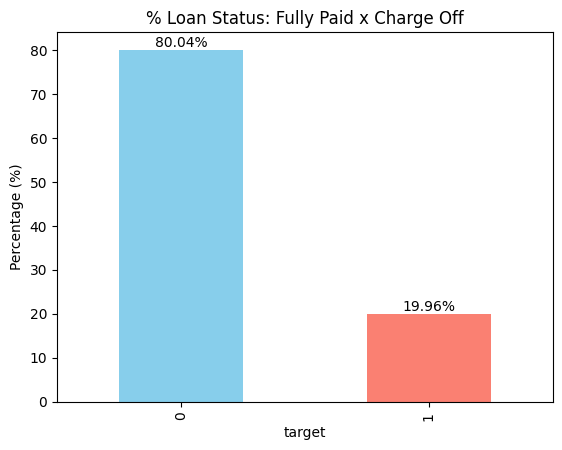

In [53]:


percentuais = df.target.value_counts(normalize=True).mul(100).round(2)


# Plotando o gráfico de barras
ax = percentuais.plot(kind='bar', color=['skyblue', 'salmon'])

# Adicionando porcentagens acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='top', 
                xytext=(0, 10), 
                textcoords='offset points')

# Definindo o título e os rótulos do eixo y
plt.title('% Loan Status: Fully Paid x Charge Off')
plt.ylabel('Percentage (%)')
plt.show()



### Studying Features

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1345310 non-null  object 
 1   loan_amnt              1345310 non-null  float64
 2   term                   1345310 non-null  object 
 3   int_rate               1345310 non-null  float64
 4   sub_grade              1345310 non-null  object 
 5   emp_length             1266799 non-null  object 
 6   home_ownership         1345310 non-null  object 
 7   annual_inc             1345310 non-null  float64
 8   addr_state             1345310 non-null  object 
 9   dti                    1344936 non-null  float64
 10  mths_since_recent_inq  1171239 non-null  float64
 11  revol_util             1344453 non-null  float64
 12  bc_open_to_buy         1284167 non-null  float64
 13  bc_util                1283398 non-null  float64
 14  num_op_rev_tl          

target
0    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
1    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
dtype: object

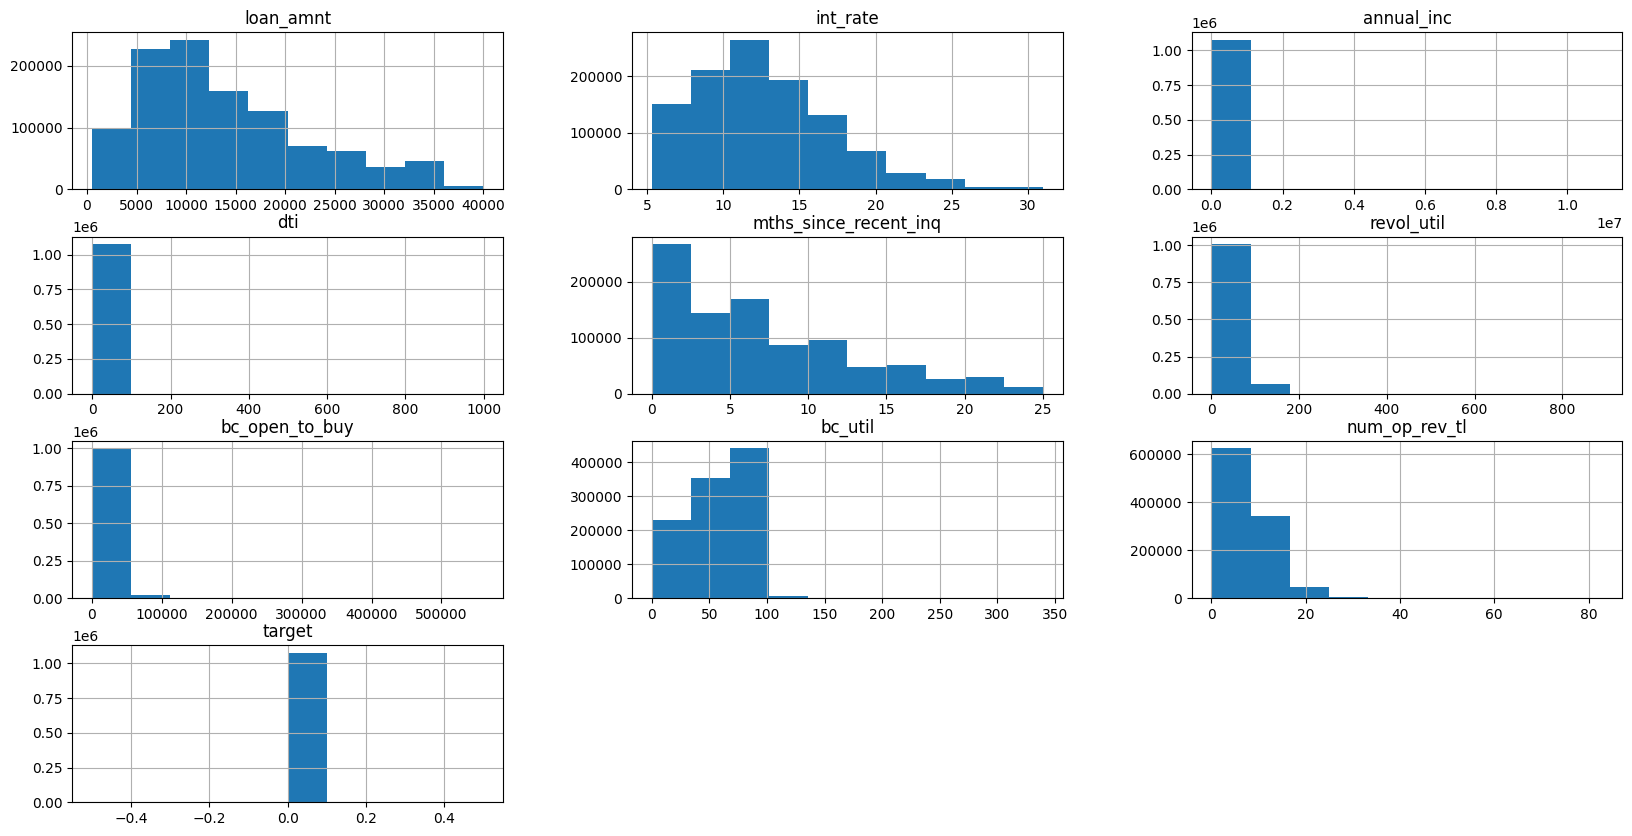

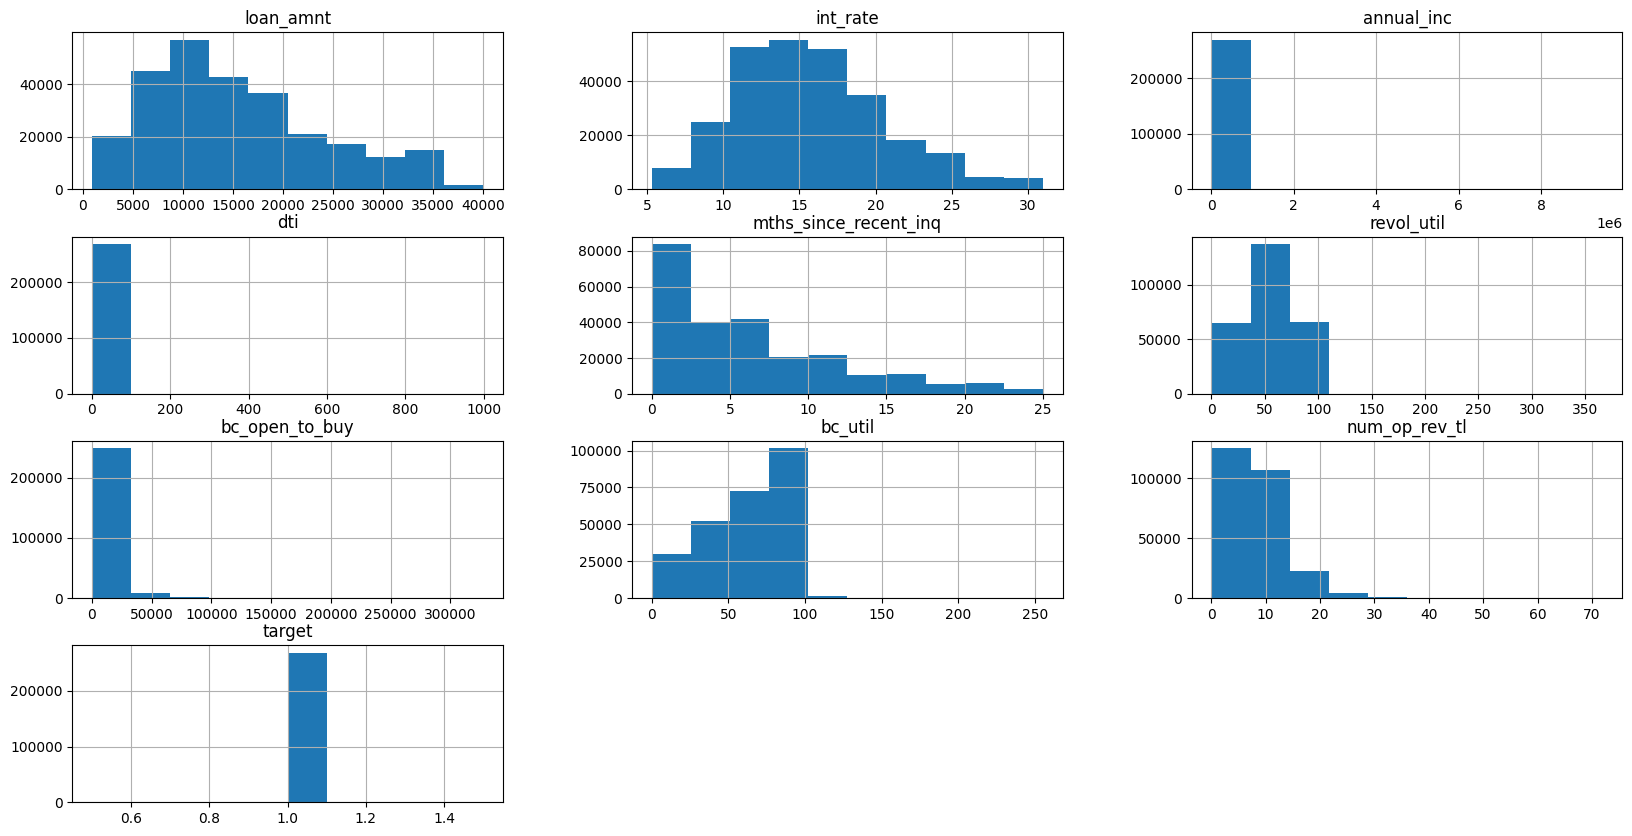

In [55]:
df.select_dtypes(include=['float64','int64']).groupby('target').hist(bins = 10, figsize = (20,10)) 

### categorical features processing



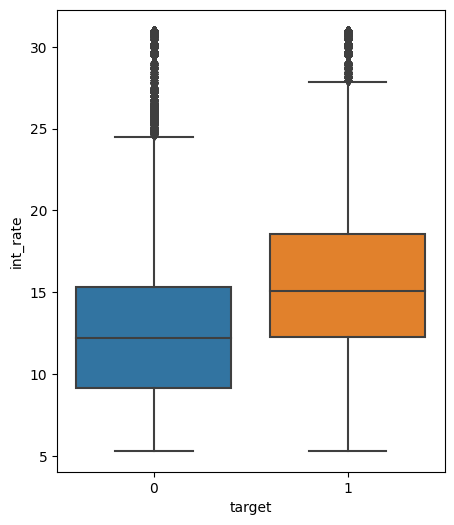

In [56]:
import seaborn as sns
plt.figure(figsize=(5, 6))
sns.boxplot(x=df['target'], y=df['int_rate'])
# plt.title("Boxplot of Buyers Battles x NonBuyers Battles")
plt.show()

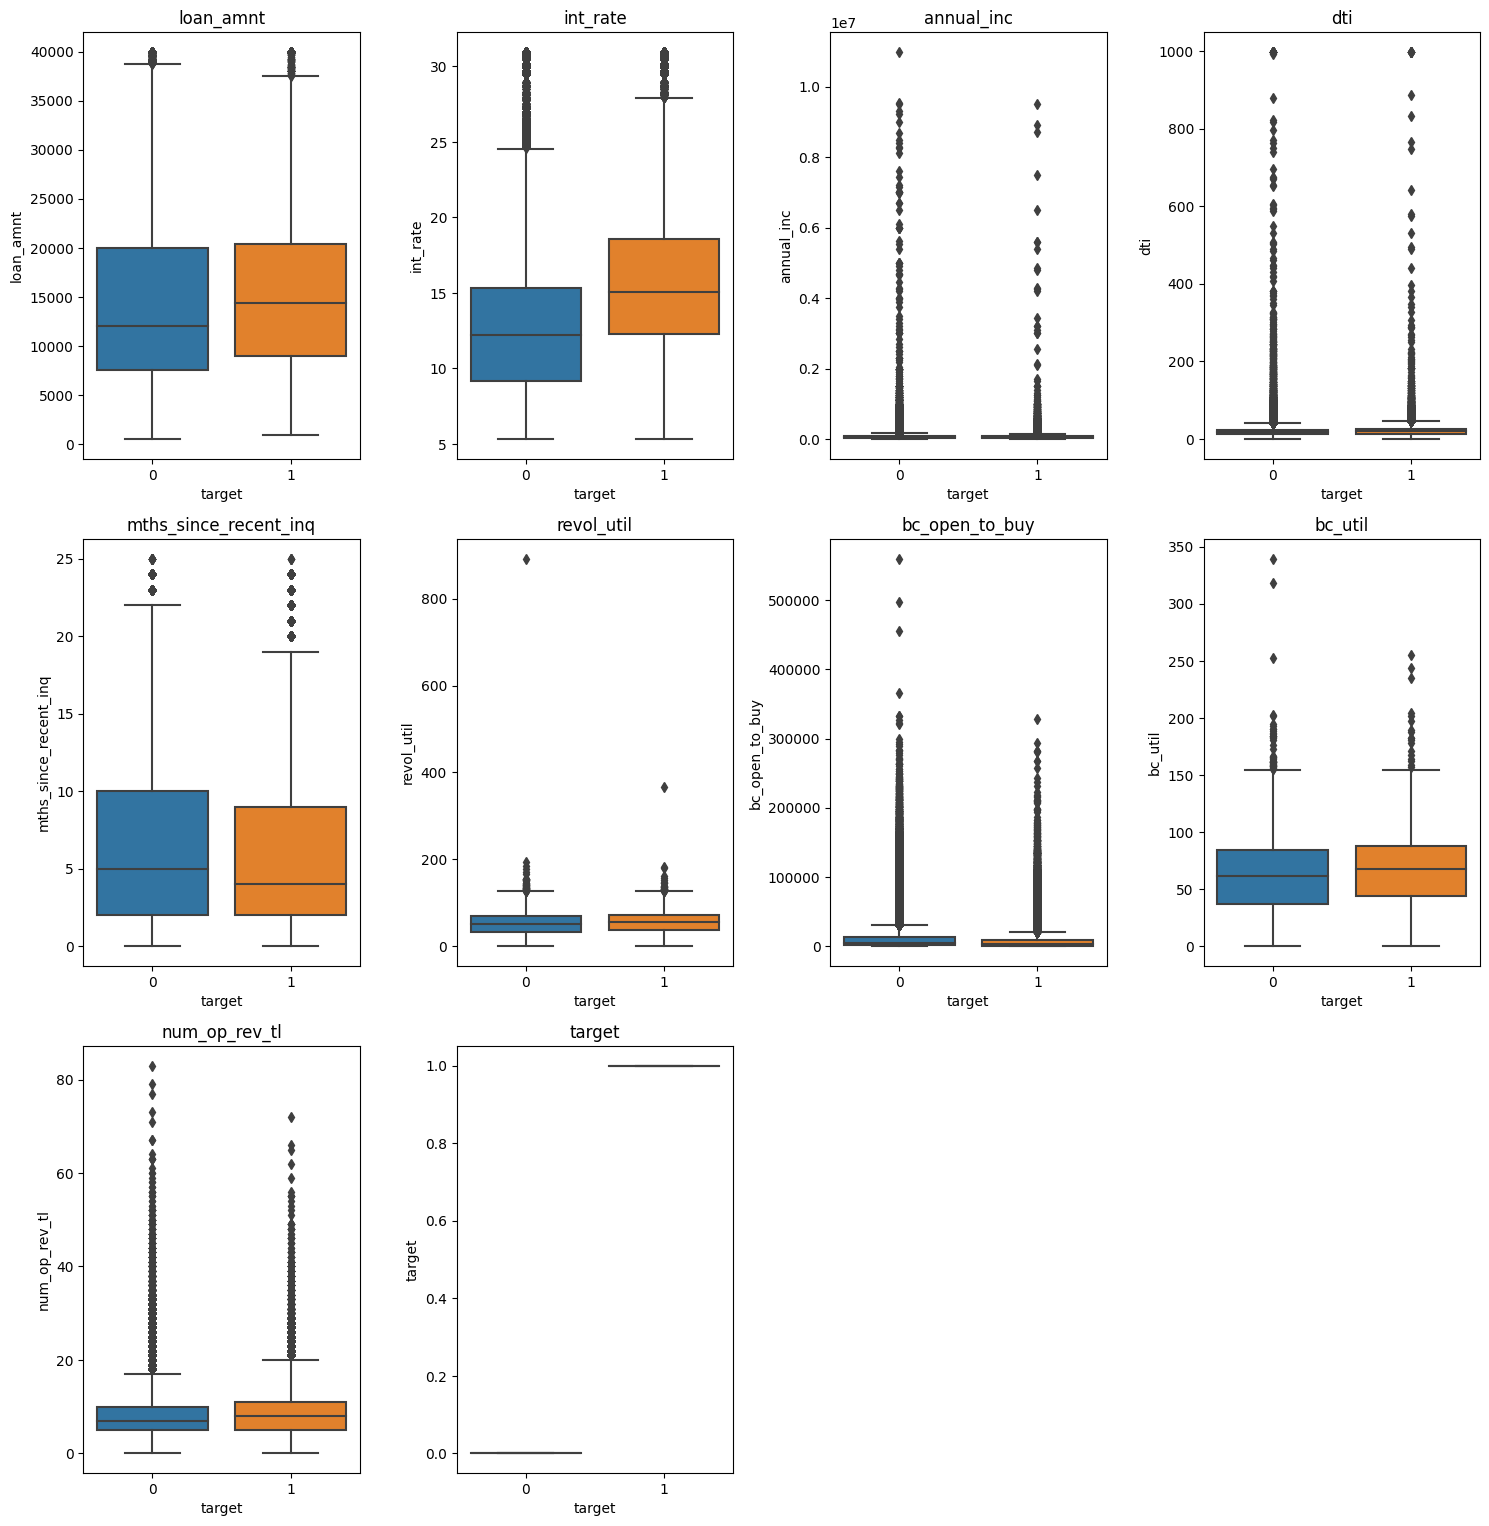

In [57]:
# Número de colunas
columns = df.select_dtypes(include=['float64','int64']).columns.tolist()
num_columns = [len(columns)]

# Criação dos boxplots
plt.figure(figsize=(15, 20))  # Defina o tamanho da figura conforme a necessidade
for i, column in enumerate(columns, 1):
    # plt.subplot(1, num_columns, i)
    plt.subplot(4, 4, i)
    # plt.boxplot(df[column])
    sns.boxplot(x=df['target'], y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### categorical features

In [58]:
columns = df.select_dtypes(include=['object']).columns.tolist()
columns

['id', 'term', 'sub_grade', 'emp_length', 'home_ownership', 'addr_state']

In [59]:
df[columns].nunique()

id                1345310
term                    2
sub_grade              35
emp_length             11
home_ownership          6
addr_state             51
dtype: int64

In [60]:
pd.crosstab(df.target,df.term)

term,36 months,60 months
target,,
0,857491,219260
1,163252,105307


In [61]:
pd.crosstab(df.target,df.home_ownership)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
target,,,,,,
0,230,551048,41,117,114968,410347
1,56,114531,7,27,29864,124074


### Transformation!

In [67]:
cleaner_app_type = {"term": {" 36 months": 1.0, " 60 months": 2.0},
                    "sub_grade": {"A1": 1.0, "A2": 2.0, "A3": 3.0, "A4": 4.0, "A5": 5.0,
                                  "B1": 11.0, "B2": 12.0, "B3": 13.0, "B4": 14.0, "B5": 15.0,
                                  "C1": 21.0, "C2": 22.0, "C3": 23.0, "C4": 24.0, "C5": 25.0,
                                  "D1": 31.0, "D2": 32.0, "D3": 33.0, "D4": 34.0, "D5": 35.0,
                                  "E1": 41.0, "E2": 42.0, "E3": 43.0, "E4": 44.0, "E5": 45.0,
                                  "F1": 51.0, "F2": 52.0, "F3": 53.0, "F4": 54.0, "F5": 55.0,
                                  "G1": 61.0, "G2": 62.0, "G3": 63.0, "G4": 64.0, "G5": 65.0,
                                    },
                     "emp_length": {"< 1 year": 0.0, '1 year': 1.0, '2 years': 2.0, '3 years': 3.0, '4 years': 4.0,
                                   '5 years': 5.0, '6 years': 6.0, '7 years': 7.0, '8 years': 8.0, '9 years': 9.0,
                                   '10+ years': 10.0 }
                   }
df = df.replace(cleaner_app_type)

### Creating map to replace addr_state by proportion of states

In [62]:
map_addr_state = (
    df.addr_state.value_counts(dropna=False,normalize=True,ascending=True)
    .cumsum().to_frame()
    .reset_index() ## bring states
    .reset_index() ## bring index
    .assign(index=lambda x: x['index'] + 1) ## adding 1 to index
    .set_index('addr_state')['index'].to_dict() ## create a map to replace by proportion
    )
df.addr_state.replace(map_addr_state,inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1345310 non-null  object 
 1   loan_amnt              1345310 non-null  float64
 2   term                   1345310 non-null  float64
 3   int_rate               1345310 non-null  float64
 4   sub_grade              1345310 non-null  float64
 5   emp_length             1266799 non-null  float64
 6   home_ownership         1345310 non-null  object 
 7   annual_inc             1345310 non-null  float64
 8   addr_state             1345310 non-null  int64  
 9   dti                    1344936 non-null  float64
 10  mths_since_recent_inq  1171239 non-null  float64
 11  revol_util             1344453 non-null  float64
 12  bc_open_to_buy         1284167 non-null  float64
 13  bc_util                1283398 non-null  float64
 14  num_op_rev_tl          

In [69]:
#another way to check feature correlations
loans_cor=df.select_dtypes(include=['float64','int64']).corr()
loans_cor


,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,addr_state,dti,mths_since_recent_inq,revol_util,bc_open_to_buy,bc_util,num_op_rev_tl,target
loan_amnt,1.000000,0.380905,0.141673,0.145153,0.089391,0.311794,0.019045,0.032057,-0.000149,0.108478,0.198762,0.052871,0.166973,0.065604
term,0.380905,1.000000,0.417230,0.432354,0.055466,0.050016,-0.018615,0.059440,-0.027421,0.063920,0.007740,0.048819,0.049946,0.176096
int_rate,0.141673,0.417230,1.000000,0.970842,-0.004209,-0.072245,-0.005065,0.146886,-0.168946,0.243152,-0.281675,0.254079,-0.008846,0.258792
sub_grade,0.145153,0.432354,0.970842,1.000000,-0.005247,-0.070813,-0.006363,0.149843,-0.175445,0.246668,-0.285405,0.258145,-0.006208,0.266006
emp_length,0.089391,0.055466,-0.004209,-0.005247,1.000000,0.066329,-0.013821,0.026039,0.001036,0.035312,0.024985,0.029180,0.111229,-0.014235
annual_inc,0.311794,0.050016,-0.072245,-0.070813,0.066329,1.000000,0.043695,-0.140488,-0.041219,0.035254,0.158734,-0.003629,0.078689,-0.041759
addr_state,0.019045,-0.018615,-0.005065,-0.006363,-0.013821,0.043695,1.000000,-0.052910,0.010914,-0.027553,0.033257,-0.026062,0.055532,0.009270
dti,0.032057,0.059440,0.146886,0.149843,0.026039,-0.140488,-0.052910,1.000000,-0.001242,0.140801,-0.059878,0.144120,0.137357,0.084510
mths_since_recent_inq,-0.000149,-0.027421,-0.168946,-0.175445,0.001036,-0.041219,0.010914,-0.001242,1.000000,0.092632,-0.020077,0.082883,-0.092829,-0.056199
revol_util,0.108478,0.063920,0.243152,0.246668,0.035312,0.035254,-0.027553,0.140801,0.092632,1.000000,-0.480061,0.855022,-0.205152,0.060048


<Axes: >

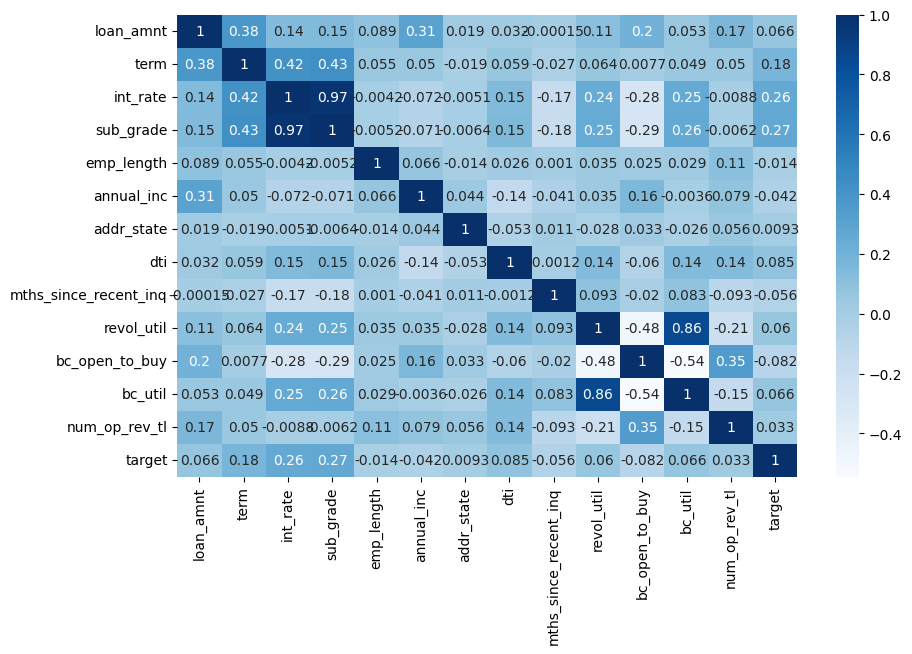

In [70]:

#add colors based on correlations numbers

plt.figure(figsize=(10,6))
sns.heatmap(loans_cor, annot=True,cmap=plt.cm.Blues)


### Transformation!

In [71]:
#drop columns
df.drop(["bc_util", "revol_util","int_rate", "sub_grade"], axis = 1, inplace = True)


<Axes: >

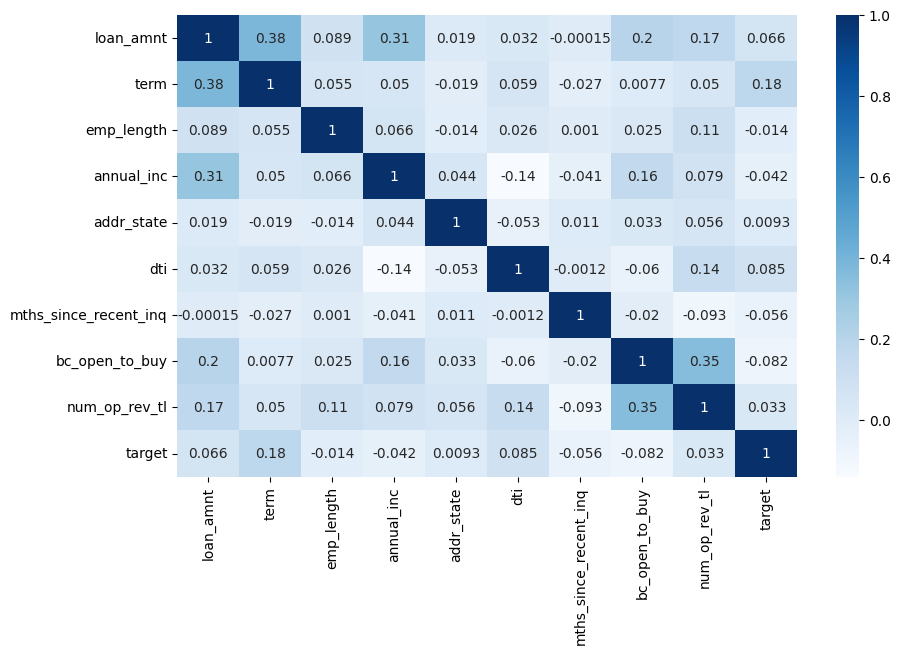

In [72]:

#add colors based on correlations numbers

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True,cmap=plt.cm.Blues)


In [73]:
df.columns.tolist()

['id',
 'loan_amnt',
 'term',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'addr_state',
 'dti',
 'mths_since_recent_inq',
 'bc_open_to_buy',
 'num_op_rev_tl',
 'target']

## METADATA

In [74]:
def BuildMetadata(dataframe,target,id): 

    train = dataframe.rename(columns={target:'target',id:'id'})
    # Verifica os tipos de variáveis presentes na tabela de treino
    t = []
    for i in train.columns:
            t.append(train[i].dtype)

    n = []
    for i in train.columns:
            n.append(i)

    aux_t = pd.DataFrame(data=t,columns=["Tipos"])
    aux_n = pd.DataFrame(data=n,columns=["Features"])
    # df_tipovars = pd.concat([aux_n, aux_t], axis=1, join_axes=[aux_n.index])
    df_tipovars = pd.concat([aux_n, aux_t.reindex(aux_n.index)], axis=1)


    data = []
    for f in train.columns:

        # Definindo o papel das variáveis:
        if f == 'target':
            role = 'target'
        elif f == 'id':
            role = 'id'
        else:
            role = 'input'

        # Definindo o tipo das variáveis: nominal, ordinal, binary ou interval
        if f == 'target':
            level = 'binary'
        if train[f].dtype == 'object' or f == 'id': 
            level = 'nominal'
        elif train[f].dtype in ['float','float64'] :
            level = 'interval'
        elif train[f].dtype in ['int','int64'] :
            level = 'ordinal'

        # Todas variáveis são incializadas com keep exceto o id
        keep = True
        if f == 'id':
            keep = False

        # Definindo o tipo das variáveis da tabela de entrada
        dtype = train[f].dtype

        # Criando a lista com todo metadados
        f_dict = {
            'Features': f,
            'Role': role,
            'Level': level,
            'Keep': keep,
            'Tipo': dtype
        }
        data.append(f_dict)

    meta = pd.DataFrame(data, columns=['Features', 'Role', 'Level', 'Keep', 'Tipo'])

    # Quantidade de domínios distintos para cada cariável do tipo ordinal e nominal
    card = []

    v = train.columns
    for f in v:
        dist_values = train[f].value_counts().shape[0]
        f_dict = {
                'Features': f,
                'Cardinality': dist_values
            }
        card.append(f_dict)

    card = pd.DataFrame(card, columns=['Features', 'Cardinality'])

    metadados_train = pd.merge(meta, card, on='Features')

    return metadados_train 

In [75]:
id = 'id' 
target = 'target'

# features = [
#  'loan_amnt',
#  'term',
#  'emp_length',
#  'home_ownership',
#  'annual_inc',
#  'addr_state',
#  'dti',
#  'mths_since_recent_inq',
#  'bc_open_to_buy',
#  'num_op_rev_tl',
# ]

# # 
# select_cols = [id] + features + [target]

# select_cols

In [76]:
select_cols = df.columns.tolist()
select_cols

['id',
 'loan_amnt',
 'term',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'addr_state',
 'dti',
 'mths_since_recent_inq',
 'bc_open_to_buy',
 'num_op_rev_tl',
 'target']

In [77]:
metadata = BuildMetadata(df[select_cols],target,id)

In [78]:
metadata.to_csv('artifacts/metadata.csv', sep=',', encoding='utf-8',index=False)
df[select_cols].to_csv('input/df.csv', sep=',', encoding='utf-8',index=False)

## stop here!

In [68]:
data = df.iloc[:,:-1]
answer = df['target']
# data = df.iloc[:,:-1]

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1345310 non-null  object 
 1   loan_amnt              1345310 non-null  float64
 2   term                   1345310 non-null  float64
 3   emp_length             1266799 non-null  float64
 4   home_ownership         1345310 non-null  object 
 5   annual_inc             1345310 non-null  float64
 6   addr_state             1345310 non-null  object 
 7   dti                    1344936 non-null  float64
 8   mths_since_recent_inq  1171239 non-null  float64
 9   revol_util             1344453 non-null  float64
 10  num_op_rev_tl          1277783 non-null  float64
dtypes: float64(8), object(3)
memory usage: 123.2+ MB


In [74]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


# Carregar um conjunto de dados de exemplo
X = data.set_index('id')
y = answer

# Identificar características numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# Criar transformadores para características numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISS')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar os transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criar e treinar o modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])

model.fit(X, y)

# Obter a importância das características
feature_importances = model.named_steps['classifier'].feature_importances_

# Para características categóricas, a importância será dividida entre as colunas codificadas,
# então precisamos somar a importância para obter a importância por característica original
encoded_cat = (model.named_steps['preprocessor']
               .named_transformers_['cat']
               .named_steps['onehot']
               .get_feature_names_out(categorical_features))

# Criar um DataFrame para mostrar a importância das características
importance_df = pd.DataFrame({
    'feature': numeric_features + list(encoded_cat),
    'importance': feature_importances
})

print(importance_df.sort_values(by='importance', ascending=False))


In [73]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Carregar o dataset (substitua isto pelos seus dados)

X = data.set_index('id')
y = answer

# Defina as colunas numéricas e categóricas (ajuste para seus dados)
numeric_features = X.select_dtypes(include=['float64','int64']).columns.tolist()  # suponhamos que todas são numéricas
categorical_features = ['home_ownership','addr_state']  # suponhamos que não há colunas categóricas

# Construir os imputers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISS'))
])


# Construir o preprocessador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Construir o pipeline com preprocessador e RandomForest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treinar o modelo
pipeline.fit(X, y)

# Obter importâncias das features
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Mostrar importância para cada coluna
for name, importance in zip(numeric_features, feature_importances):
    print(name, "=", importance)

# Selecionar as features mais importantes (por exemplo, com importância acima de 0.2)
important_features = [name for name, score in zip(numeric_features, feature_importances) if score > 0.2]
print("\nFeatures selecionadas:", important_features)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X_train,y_train,X_test,y_test = train_test_split(data,answer,test_size=0.3)
sel = RandomForestClassifier(n_estimators = 100)
sel.fit(X_train, y_train)

sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

ValueError: could not convert string to float: 'MORTGAGE'

In [35]:
#define the list of categorical features want to process
cat_columns = ["home_ownership", "addr_state"]
#create a new DataFrame for our processed data
df = pd.get_dummies(df, prefix_sep="__",
                              columns=cat_columns,
                              dtype=int)
df.head()

,id,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,mths_since_recent_inq,revol_util,...,addr_state__SD,addr_state__TN,addr_state__TX,addr_state__UT,addr_state__VA,addr_state__VT,addr_state__WA,addr_state__WI,addr_state__WV,addr_state__WY
0,68407277,3600.0,1.0,13.99,24.0,10.0,55000.0,5.91,4.0,29.7,...,0,0,0,0,0,0,0,0,0,0
1,68355089,24700.0,1.0,11.99,21.0,10.0,65000.0,16.06,0.0,19.2,...,1,0,0,0,0,0,0,0,0,0
2,68341763,20000.0,2.0,10.78,14.0,10.0,63000.0,10.78,10.0,56.2,...,0,0,0,0,0,0,0,0,0,0
4,68476807,10400.0,2.0,22.45,51.0,3.0,104433.0,25.37,1.0,64.5,...,0,0,0,0,0,0,0,0,0,0
5,68426831,11950.0,1.0,13.44,23.0,4.0,34000.0,10.20,NaN,68.4,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.head()

,id,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,mths_since_recent_inq,revol_util,...,addr_state__SD,addr_state__TN,addr_state__TX,addr_state__UT,addr_state__VA,addr_state__VT,addr_state__WA,addr_state__WI,addr_state__WV,addr_state__WY
0,68407277,3600.0,1.0,13.99,24.0,10.0,55000.0,5.91,4.0,29.7,...,0,0,0,0,0,0,0,0,0,0
1,68355089,24700.0,1.0,11.99,21.0,10.0,65000.0,16.06,0.0,19.2,...,1,0,0,0,0,0,0,0,0,0
2,68341763,20000.0,2.0,10.78,14.0,10.0,63000.0,10.78,10.0,56.2,...,0,0,0,0,0,0,0,0,0,0
4,68476807,10400.0,2.0,22.45,51.0,3.0,104433.0,25.37,1.0,64.5,...,0,0,0,0,0,0,0,0,0,0
5,68426831,11950.0,1.0,13.44,23.0,4.0,34000.0,10.20,NaN,68.4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

#drop columns
loans.drop(["bc_util", "bc_open_to_buy","int_rate", "grade"], axis = 1, inplace = True)


## METADATA

In [ ]:
def BuildMetadata(dataframe,target,id): 

    train = dataframe.rename(columns={target:'target',id:'id'})
    # Verifica os tipos de variáveis presentes na tabela de treino
    t = []
    for i in train.columns:
            t.append(train[i].dtype)

    n = []
    for i in train.columns:
            n.append(i)

    aux_t = pd.DataFrame(data=t,columns=["Tipos"])
    aux_n = pd.DataFrame(data=n,columns=["Features"])
    # df_tipovars = pd.concat([aux_n, aux_t], axis=1, join_axes=[aux_n.index])
    df_tipovars = pd.concat([aux_n, aux_t.reindex(aux_n.index)], axis=1)


    data = []
    for f in train.columns:

        # Definindo o papel das variáveis:
        if f == 'target':
            role = 'target'
        elif f == 'id':
            role = 'id'
        else:
            role = 'input'

        # Definindo o tipo das variáveis: nominal, ordinal, binary ou interval
        if f == 'target':
            level = 'binary'
        if train[f].dtype == 'object' or f == 'id': 
            level = 'nominal'
        elif train[f].dtype in ['float','float64'] :
            level = 'interval'
        elif train[f].dtype in ['int','int64'] :
            level = 'ordinal'

        # Todas variáveis são incializadas com keep exceto o id
        keep = True
        if f == 'id':
            keep = False

        # Definindo o tipo das variáveis da tabela de entrada
        dtype = train[f].dtype

        # Criando a lista com todo metadados
        f_dict = {
            'Features': f,
            'Role': role,
            'Level': level,
            'Keep': keep,
            'Tipo': dtype
        }
        data.append(f_dict)

    meta = pd.DataFrame(data, columns=['Features', 'Role', 'Level', 'Keep', 'Tipo'])

    # Quantidade de domínios distintos para cada cariável do tipo ordinal e nominal
    card = []

    v = train.columns
    for f in v:
        dist_values = train[f].value_counts().shape[0]
        f_dict = {
                'Features': f,
                'Cardinality': dist_values
            }
        card.append(f_dict)

    card = pd.DataFrame(card, columns=['Features', 'Cardinality'])

    metadados_train = pd.merge(meta, card, on='Features')

    return metadados_train 

In [ ]:
id = '' 
target = ''

features = [
'platform', 
'graphics_memory_size', 
'system_memory_size',
'adcquision_network', 
]

# 
select_cols = [id] + features + [target]
select_cols

In [ ]:
metadata = BuildMetadata(df[select_cols],target,id)

In [ ]:
metadata.to_csv('artifacts/metadata.csv', sep=',', encoding='utf-8',index=False)
df[select_cols].to_csv('input/df.csv', sep=',', encoding='utf-8',index=False)